# PROJECT BRIEF

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry.

Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

# The Data

On the same MySQL instance from last week, in the schema `movies`, is some movie-related data from:
* Box Office Mojo
* IMDB
* Rotten Tomatoes
* TheMovieDB.org

# The Deliverables

There are three required deliverables for this project:

1. A well documented **Jupyter Notebook** containing any code you've written for this project and comments explaining it.
2. An organized **README.md** file in the GitHub repository that describes the contents of the repository. This file should be the source of information for navigating through the repository.
3. A Github repository containing all of the above files and any additional files worth includding
4. [OPTIONAL] A short **slide deck** (delivered as a PDF export) giving a high-level overview of your methodology and recommendations for non-technical stakeholders. If you do this, make sure to also add and commit this pdf of your non-technical presentation to your repository with a file name of presentation.pdf.

### Jupyter Notebook Must-Haves

For this project, your Jupyter Notebook should meet the following specifications:

#### Organization/Code Cleanliness

* The notebook should be well organized, easy to follow,  and code should be commented where appropriate.  
    * Level Up: The notebook contains well-formatted, professional looking markdown cells explaining any substantial code.  All functions have [docstrings](https://numpydoc.readthedocs.io/en/latest/format.html) that act as professional-quality documentation
* The notebook is written for technical audiences with a way to both understand your approach and reproduce your results. The target audience for this deliverable is other data scientists looking to validate your findings.

#### Visualizations & EDA

* Your project contains at least 4 meaningful data visualizations, with corresponding interpretations. All visualizations are well labeled with axes labels, a title, and a legend (when appropriate)  
* You pose at least 3 meaningful questions and answer them through EDA.  These questions should be well labeled and easy to identify inside the notebook.
    * **Level Up**: Each question is clearly answered with a visualization that makes the answer easy to understand.   
* Your notebook should contain 1 - 2 paragraphs briefly explaining your approach to this project.

# Our Questions To Answer

1. How has the popularity (reviews/ratings) of certain genres changed over time? Colm

2. Is there an optimal run time and does that vary by domestic vs. foreign? Josh

3. Who are the most succesful (movie ratings) writers, directors and producers? Josh

4. Is there a correlation between production budget and domestic/worldwide earnings?



In [278]:
#Import Packages and Connect To Database

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
%matplotlib inline

con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')


In [186]:
# Get IMDB Tables

df_imdb_title_ratings= pd.read_sql_query("""
SELECT *
FROM imdb_title_ratings
;""", con)

df_imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt0063540,7.0,77
1,tt0066787,7.2,43
2,tt0069049,6.9,4517
3,tt0069204,6.1,13
4,tt0100275,6.5,119


In [187]:
# Get IMDB Tables

df_imdb_title_basics= pd.read_sql_query("""
SELECT *
FROM imdb_title_basics
;""", con)

df_imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [188]:
#Merged IMDB Tables / Cleaned Run-Time

imdb_title_combined = pd.merge(df_imdb_title_basics, df_imdb_title_ratings, how='inner', on='tconst')

imdb_title_combined = imdb_title_combined.dropna(axis=0, subset=['runtime_minutes']).sort_values('start_year')


In [10]:
# Converting RunTime to INT

imdb_title_combined['runtime_minutes'] = imdb_title_combined['runtime_minutes'].astype(int)
imdb_title_combined

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
9065,tt1745772,My Heart Is an Idiot,My Heart Is an Idiot,2010,98,"Documentary,Drama,Romance",8.2,10
6181,tt1640402,Belukar,Belukar,2010,96,"Action,Drama,Romance",6.9,9
6180,tt1640401,Andartu terlampau... 21 hari mencari suami,Andartu terlampau... 21 hari mencari suami,2010,90,Comedy,7.2,6
6177,tt1640220,Mr. Hush,Mr. Hush,2010,85,Horror,2.2,370
14040,tt1950461,Women of the Future,Women of the Future,2010,16,"Biography,Documentary",8.0,7
...,...,...,...,...,...,...,...,...
580,tt10052290,Love and Mercy,Milosc i milosierdzie,2019,104,"Biography,Drama,Family",5.4,18
582,tt10055770,Vellai Pookal,Vellaipookal,2019,122,Thriller,7.6,380
38919,tt3699702,The Divorce Party,The Divorce Party,2019,93,"Comedy,Romance",5.0,265
71311,tt8647310,Buffaloed,Buffaloed,2019,95,"Comedy,Drama",7.6,18


In [11]:
df_rt_movie_info= pd.read_sql_query("""
SELECT *
FROM rt_movie_info
;""", con)

df_rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",,,104 minutes,None
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",,,116 minutes,None
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",,,128 minutes,None
4,7,,NR,Drama|Romance,Rodney Bennett,Giles Cooper,,,,,200 minutes,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,,,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",,,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,,"Jan 1, 1962","May 11, 2004",,,111 minutes,None
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",,,101 minutes,None


In [12]:
df_rt_reviews= pd.read_sql_query("""
SELECT *
FROM rt_movie_info
;""", con)

df_rt_reviews.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",,,104 minutes,None
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",,,116 minutes,None
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",,,128 minutes,None
4,7,,NR,Drama|Romance,Rodney Bennett,Giles Cooper,,,,,200 minutes,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,,,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",,,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,,"Jan 1, 1962","May 11, 2004",,,111 minutes,None
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",,,101 minutes,None


In [13]:
#Combining RT Tables

df_rt_combined = pd.merge(df_rt_movie_info,df_rt_reviews,how='inner',on='id')
df_rt_combined.head()

,id,synopsis_x,rating_x,genre_x,director_x,writer_x,theater_date_x,dvd_date_x,currency_x,box_office_x,...,rating_y,genre_y,director_y,writer_y,theater_date_y,dvd_date_y,currency_y,box_office_y,runtime_y,studio_y
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",,,...,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",,,104 minutes,None
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",...,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",,,...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",,,116 minutes,None
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",,,...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",,,128 minutes,None
4,7,,NR,Drama|Romance,Rodney Bennett,Giles Cooper,,,,,...,NR,Drama|Romance,Rodney Bennett,Giles Cooper,,,,,200 minutes,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,,,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",...,R,Action and Adventure|Horror|Mystery and Suspense,,,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",,,...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",,,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,,"Jan 1, 1962","May 11, 2004",,,...,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,,"Jan 1, 1962","May 11, 2004",,,111 minutes,None
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",,,...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",,,101 minutes,None


In [14]:
#Clean RunTime Column

df_rt_combined['runtime'] = df_rt_combined['runtime_y'].str.split(" ").map(lambda x: x[0])

df_rt_combined['runtime'] = pd.to_numeric(df_rt_combined['runtime'])

df_rt_combined.head()

,id,synopsis_x,rating_x,genre_x,director_x,writer_x,theater_date_x,dvd_date_x,currency_x,box_office_x,...,genre_y,director_y,writer_y,theater_date_y,dvd_date_y,currency_y,box_office_y,runtime_y,studio_y,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",,,...,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",,,104 minutes,None,104.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",...,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,108.0
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",,,...,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",,,116 minutes,None,116.0
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",,,...,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",,,128 minutes,None,128.0
4,7,,NR,Drama|Romance,Rodney Bennett,Giles Cooper,,,,,...,Drama|Romance,Rodney Bennett,Giles Cooper,,,,,200 minutes,None,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,,,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",...,Action and Adventure|Horror|Mystery and Suspense,,,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema,106.0
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",,,...,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",,,88 minutes,Paramount Vantage,88.0
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,,"Jan 1, 1962","May 11, 2004",,,...,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,,"Jan 1, 1962","May 11, 2004",,,111 minutes,None,111.0
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",,,...,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",,,101 minutes,None,101.0


In [15]:
#Get TMDB Table

df_tmdb= pd.read_sql_query("""
SELECT *
FROM tmdb_movies
;""", con)

df_tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,26512,488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [16]:
#Convert Release_Date

df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])

df_tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,26512,488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [17]:
#Get BOM Table

df_bom= pd.read_sql_query("""
SELECT *
FROM bom_movie_gross
;""", con)

df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [18]:
#Create Worldwide Column

df_bom['foreign_gross'] = df_bom['foreign_gross'].fillna(0)

df_bom['worldwide_gross'] = df_bom['foreign_gross'] + df_bom['domestic_gross']
df_bom

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,0.0,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,0.0,2018,2.400000e+03


In [72]:
#Get TN Table

df_tn= pd.read_sql_query("""
SELECT *
FROM tn_movie_budgets
;""", con)

df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [74]:
df_tn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [20]:
#Clean Columns

df_tn['release_date'] = pd.to_datetime(df_tn['release_date'])

df_tn['production_budget'] = df_tn['production_budget'].str.split('$').map(lambda x: x[1].replace(',','')).astype(int)
df_tn['domestic_gross'] = df_tn['domestic_gross'].str.split('$').map(lambda x: x[1].replace(',','')).astype(int)
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.split('$').map(lambda x: x[1].replace(',','')).astype(int)

df_tn.info()


# pd.to_numeric(df_tn['production_budget'])

OverflowError: Python int too large to convert to C long

In [33]:
#Add Foreign Column

df_tn['foreign_gross'] = df_tn['worldwide_gross'] - df_tn['domestic_gross']

df_tn.info()

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [ ]:
imdb_title_combined

# Question 1 - How does genre impact movie success?

In [189]:
df_imdb_tmdb= pd.read_sql_query("""
SELECT *
FROM tmdb_imdb_link
;""", con)

df_imdb_tmdb

,imdb_id,tmdb_id
0,1,16612
1,3,88013
2,7,159895
3,8,105158
4,10,774
...,...,...
62418,11057912,636593
62419,11101550,640427
62420,11108064,642749
62421,11168100,642203


In [22]:
#Clean IMDB IDs

imdb_title_combined['tconst'] = imdb_title_combined['tconst'].str.lstrip('tt')

imdb_title_combined = imdb_title_combined.rename(columns={'tconst': 'imdb_id'})

imdb_title_combined['imdb_id'] = imdb_title_combined['imdb_id'].astype(int)

#Clean TMDB IDs

df_tmdb = df_tmdb.rename(columns={'id': 'tmdb_id'})

#Merge

connected_imdb_tmdb = pd.merge(imdb_title_combined, df_imdb_tmdb, how='inner', on='imdb_id')

master_imdb_tmdb = pd.merge(connected_imdb_tmdb, df_tmdb, how='inner', on='tmdb_id')

master_imdb_tmdb = master_imdb_tmdb.rename(columns={'averagerating': 'averagerating_imdb', 'vote_average': 'vote_average_tmdb'})

master_imdb_tmdb

,imdb_id,primary_title,original_title_x,start_year,runtime_minutes,genres,averagerating_imdb,numvotes,tmdb_id,genre_ids,original_language,original_title_y,popularity,release_date,title,vote_average_tmdb,vote_count
0,1640220,Mr. Hush,Mr. Hush,2010,85,Horror,2.2,370,123389,849,en,Mr. Hush,2.042,2010-08-01,Mr. Hush,2.3,7
1,1639901,A Screaming Man,Un homme qui crie,2010,92,Drama,6.7,1370,57602,789,fr,Un homme qui crie,2.211,2010-09-28,A Screaming Man,6.1,10
2,1639426,Udaan,Udaan,2010,134,Drama,8.2,38827,45316,417,hi,उड़ान,5.376,2010-06-17,Udaan,7.2,83
3,1640680,Armadillo,Armadillo,2010,105,"Documentary,War",7.5,8906,37828,3023,da,Armadillo,4.631,2011-04-15,Armadillo,7.2,61
4,1641638,The Legend Is Born: Ip Man,Yip Man chin chyun,2010,100,"Action,Biography,Drama",7.1,29529,44249,928,cn,葉問前傳,1.832,2010-06-24,The Legend Is Born: Ip Man,6.7,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10430,6921996,Johnny English Strikes Again,Johnny English Strikes Again,2018,89,"Action,Adventure,Comedy",6.2,46932,463272,23860,en,Johnny English Strikes Again,25.478,2018-10-26,Johnny English Strikes Again,6.2,1035
10431,2837574,The Old Man & the Gun,The Old Man & the Gun,2018,93,"Biography,Comedy,Crime",6.8,25902,429203,24004,en,The Old Man & the Gun,14.001,2018-09-28,The Old Man & the Gun,6.5,306
10432,5104604,Isle of Dogs,Isle of Dogs,2018,101,"Adventure,Animation,Comedy",7.9,108245,399174,23934,en,Isle of Dogs,16.954,2018-03-23,Isle of Dogs,7.9,1942
10433,6921496,A Bluebird in My Heart,A Bluebird in My Heart,2018,85,Drama,5.5,149,478308,25039,en,A Bluebird in My Heart,3.172,2018-03-10,A Bluebird in My Heart,7.6,9


In [23]:
master_imdb_tmdb = master_imdb_tmdb.rename_axis('master_id')



In [24]:
full_list = master_imdb_tmdb['genres'].str.split(',').apply(frozenset).to_frame(name='genres')
for genres in frozenset.union(*full_list.genres):
    full_list[genres] = full_list.apply(lambda _: int(genres in _.genres), axis=1)
full_list

,genres,Drama,,Animation,Comedy,Documentary,Musical,Mystery,History,War,...,Horror,Music,Fantasy,Biography,Romance,Family,Reality-TV,Crime,Western,Thriller
master_id,,,,,,,,,,,,,,,,,,,,,
0,(Horror),0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,(Drama),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,(Drama),1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"(Documentary, War)",0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"(Drama, Action, Biography)",1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10430,"(Action, Comedy, Adventure)",0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10431,"(Crime, Biography, Comedy)",0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
10432,"(Animation, Comedy, Adventure)",0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
master_imdb_tmdb = pd.merge(master_imdb_tmdb, full_list,how='left', on='master_id')

In [26]:
genre_names = full_list.columns
genre_names = list(genre_names[2:26])

genre_names_df = pd.DataFrame(genre_names)
genre_names_df = genre_names_df.rename(columns={0: 'genre_name'})


In [27]:
#IMDB AVERAGES

genre_imdbscore_averages = []

for i in genre_names:
    holder = master_imdb_tmdb.loc[master_imdb_tmdb[i] == 1]
    genre_imdbscore_averages.append(holder['averagerating_imdb'].mean())

genre_imdbscore_average_df = pd.DataFrame(genre_imdbscore_averages)
genre_imdbscore_average_df = genre_imdbscore_average_df.rename(columns={0: 'averagerating_imdb'})
genre_combined_df = pd.merge(genre_names_df,genre_imdbscore_average_df,left_index=True,right_index=True).sort_values('averagerating_imdb')

[Text(0, 0.5, 'Genre'), Text(0.5, 0, 'Average IMDB Rating')]

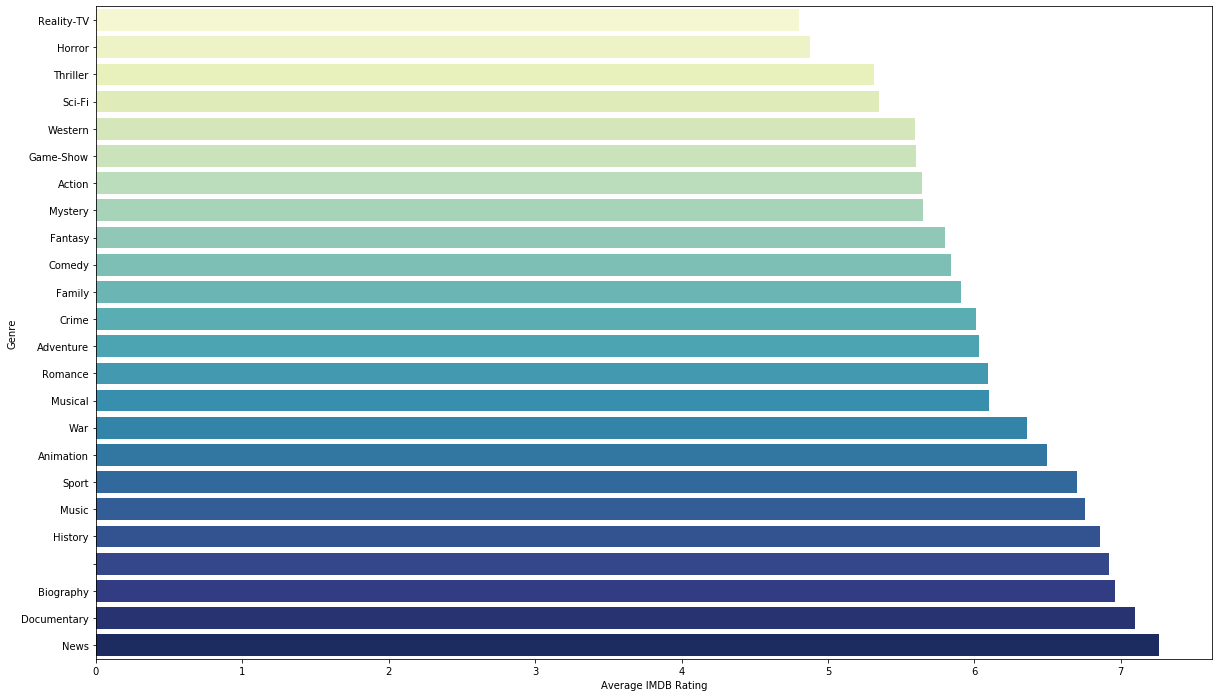

In [28]:
f, ax = plt.subplots(figsize=(20,12))
plt.style.use('fivethirtyeight')
sns.color_palette("YlGnBu", 10)
sns.barplot(genre_combined_df['averagerating_imdb'],genre_combined_df['genre_name'], palette='YlGnBu')
ax.set(xlabel='Average IMDB Rating', ylabel='Genre')

In [29]:
#POPULARITY SCORE

genre_popularity_averages = []

for i in genre_names:
    holder = master_imdb_tmdb.loc[master_imdb_tmdb[i] == 1]
    genre_popularity_averages.append(holder['popularity'].mean())

genre_popularity_averages_df = pd.DataFrame(genre_popularity_averages)
genre_popularity_averages_df = genre_popularity_averages_df.rename(columns={0: 'average_popularity'})
genre_combined_df = pd.merge(genre_combined_df,genre_popularity_averages_df,left_index=True,right_index=True).sort_values('average_popularity')
genre_combined_df


,genre_name,averagerating_imdb,average_popularity
20,Reality-TV,4.800000,0.697000
8,News,7.260294,1.692544
3,Documentary,7.095866,2.062871
0,,6.922222,2.599667
11,Sport,6.701826,4.111461
15,Music,6.758011,4.328401
6,History,6.859368,4.689458
4,Musical,6.098485,4.829530
22,Western,5.594872,5.150628
7,War,6.360000,5.210320


[Text(0.5, 0, 'Average TMDB Popularity Rating')]

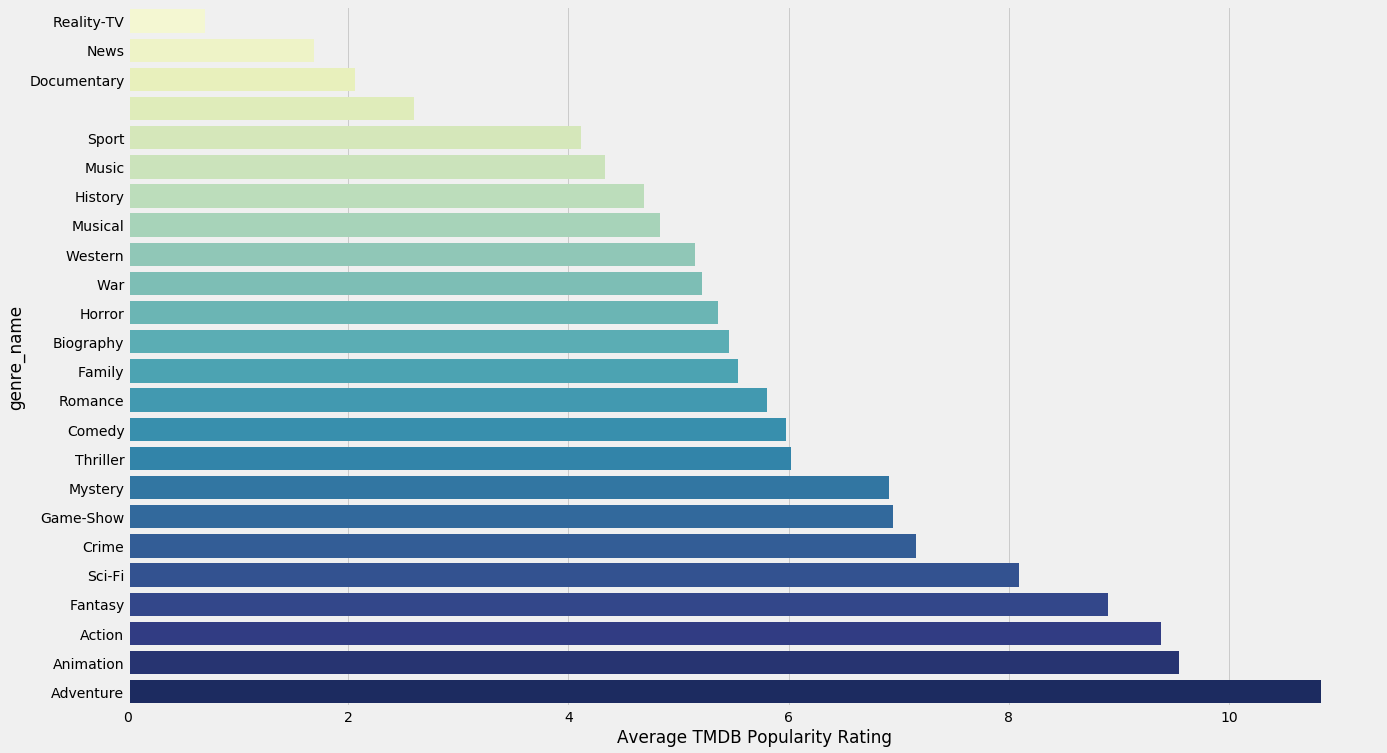

In [30]:
f, ax = plt.subplots(figsize=(20,12))
plt.style.use('fivethirtyeight')
sns.barplot(genre_combined_df['average_popularity'],genre_combined_df['genre_name'], palette='YlGnBu')
ax.set(xlabel='Average TMDB Popularity Rating')




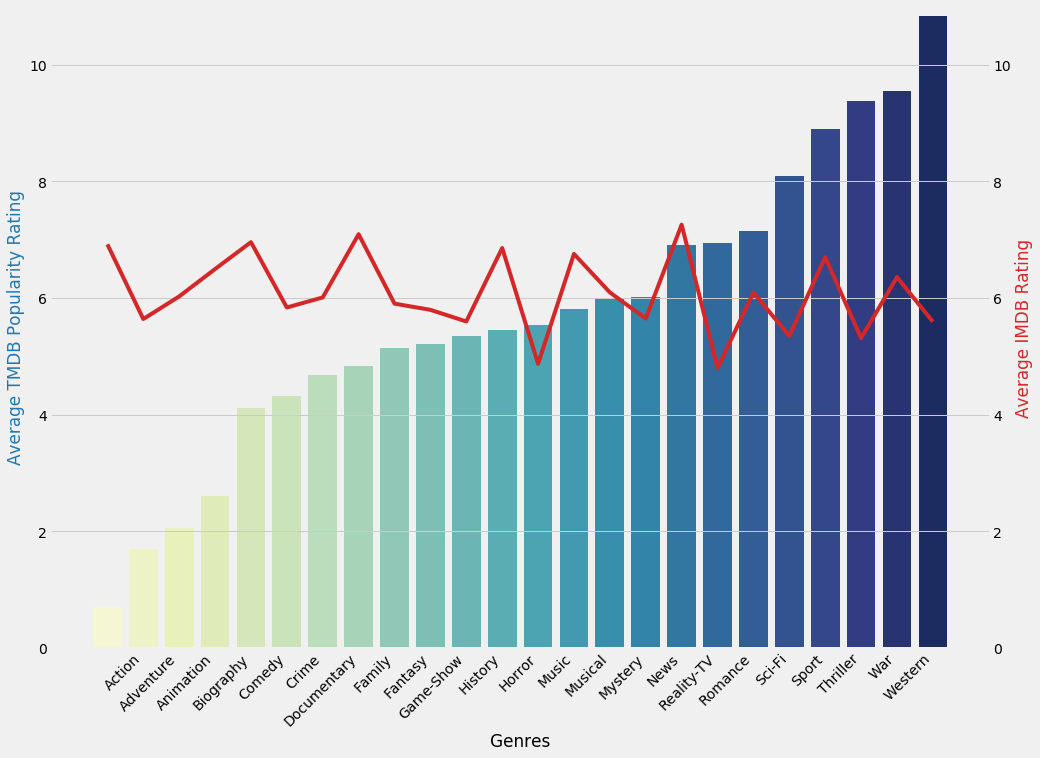

In [31]:
f, ax1 = plt.subplots(figsize=(15,11))
ax1 = sns.barplot(x='genre_name',y='average_popularity',data=genre_combined_df, palette='YlGnBu')
ax1.set(ylabel='Average TMDB Popularity Rating', xlabel='Genres')
ax1.set_ylabel('Average TMDB Popularity Rating', color='tab:blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylim(bottom=0,top=11)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x='genre_name', y='averagerating_imdb', data = genre_combined_df, color='tab:red')
ax2.set_ylabel('Average IMDB Rating', color='tab:red')
ax2.set_ylim(bottom=0,top=11)
plt.show()


In [32]:
sns.lmplot('worldwide_gross','averagerating_imdb', test_combo)

NameError: name 'test_combo' is not defined

In [ ]:
sns.lmplot('worldwide_gross','popularity', test_combo)

In [ ]:
genre_runtime_average = []

for i in genre_names:
    holder = master_imdb_tmdb.loc[master_imdb_tmdb[i] == 1]
    genre_runtime_average.append(holder['runtime_minutes'].median())

genre_runtime_average_df = pd.DataFrame(genre_runtime_average)
genre_runtime_average_df = genre_runtime_average_df.rename(columns={0: 'average_runtime'})

genre_combined_df = pd.merge(genre_combined_df,genre_runtime_average_df,left_index=True,right_index=True).sort_values('average_runtime')



In [ ]:
genre_combined_df_subset = genre_combined_df.loc[
(genre_combined_df['genre_name']=='Sci-Fi') |
(genre_combined_df['genre_name']=='Western')
]

In [ ]:
f, ax = plt.subplots(figsize=(20,12))
plt.style.use('fivethirtyeight')
sns.barplot(genre_combined_df_subset['average_runtime'],genre_combined_df_subset['genre_name'], palette='YlGnBu')
ax.set(xlabel='Median Runtime', ylabel='Genre')



# QUESTION 2: ?

In [169]:
df_bom['studio'].unique()

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Wein.', 'Sony',
       'FoxS', 'SGem', 'WB (NL)', 'LGF', 'MBox', 'CL', 'W/Dim.', 'CBS',
       'Focus', 'MGM', 'Over.', 'Mira.', 'IFC', 'CJ', 'NM', 'SPC', 'ParV',
       'Gold.', 'JS', 'RAtt.', 'Magn.', 'Free', '3D', 'UTV', 'Rela.',
       'Zeit.', 'Anch.', 'PDA', 'Lorb.', 'App.', 'Drft.', 'Osci.', 'IW',
       'Rog.', '', 'Eros', 'Relbig.', 'Viv.', 'Hann.', 'Strand', 'NGE',
       'Scre.', 'Kino', 'Abr.', 'CZ', 'ATO', 'First', 'GK', 'FInd.',
       'NFC', 'TFC', 'Pala.', 'Imag.', 'NAV', 'Arth.', 'CLS', 'Mont.',
       'Olive', 'CGld', 'FOAK', 'IVP', 'Yash', 'ICir', 'FM', 'Vita.',
       'WOW', 'Truly', 'Indic.', 'FD', 'Vari.', 'TriS', 'ORF', 'IM',
       'Elev.', 'Cohen', 'NeoC', 'Jan.', 'MNE', 'Trib.', 'Rocket',
       'OMNI/FSR', 'KKM', 'Argo.', 'SMod', 'Libre', 'FRun', 'WHE', 'P4',
       'KC', 'SD', 'AM', 'MPFT', 'Icar.', 'AGF', 'A23', 'Da.', 'NYer',
       'Rialto', 'DF', 'KL', 'ALP', 'LG/S', 'WGUSA', 'MPI', 'RTWC', 'FIP'

In [160]:
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


[Text(0.5, 0, 'Top 10 Studios by Gross')]

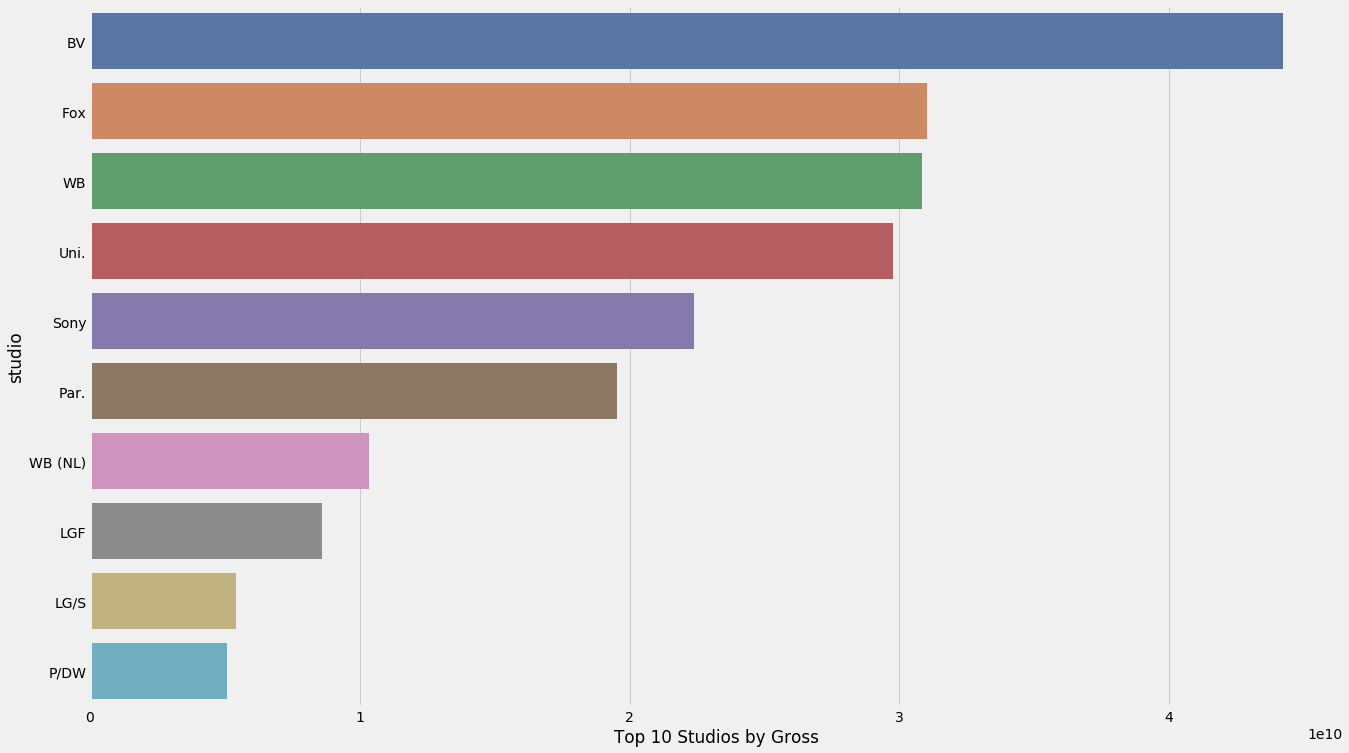

In [159]:
bom_studio = df_bom.groupby('studio').sum().sort_values('worldwide_gross',ascending=False).head(10)

f, ax = plt.subplots(figsize=(20,12))
plt.style.use('fivethirtyeight')
sns.barplot(bom_studio['worldwide_gross'],bom_studio.index, palette='deep')
ax.set(xlabel='Top 10 Studios by Gross')

In [244]:
slim_imdb_tmdb = master_imdb_tmdb

In [246]:
slim_imdb_tmdb = slim_imdb_tmdb.drop(columns=slim_imdb_tmdb.loc[:,slim_imdb_tmdb.loc[:,'original_title_x':'runtime_minutes'].join(slim_imdb_tmdb.loc[:,'original_title_y':'Thriller']).columns],axis =1)


,imdb_id,primary_title,genres_x,averagerating_imdb,numvotes,tmdb_id,genre_ids,original_language
master_id,,,,,,,,
0,1640220,Mr. Hush,Horror,2.2,370,123389,849,en
1,1639901,A Screaming Man,Drama,6.7,1370,57602,789,fr
2,1639426,Udaan,Drama,8.2,38827,45316,417,hi
3,1640680,Armadillo,"Documentary,War",7.5,8906,37828,3023,da
4,1641638,The Legend Is Born: Ip Man,"Action,Biography,Drama",7.1,29529,44249,928,cn
...,...,...,...,...,...,...,...,...
10430,6921996,Johnny English Strikes Again,"Action,Adventure,Comedy",6.2,46932,463272,23860,en
10431,2837574,The Old Man & the Gun,"Biography,Comedy,Crime",6.8,25902,429203,24004,en
10432,5104604,Isle of Dogs,"Adventure,Animation,Comedy",7.9,108245,399174,23934,en


In [268]:
slim_imdb_tmdb = slim_imdb_tmdb.rename(columns= {'primary_title': 'movie'})

In [279]:
df_rt_imdb= pd.read_sql_query("""
SELECT *
FROM rt_imdb_link
;""", con)

df_rt_imdb

,imdbid,rtid,title,year,mpaa_rating,runtime
0,4,497213641,Un bon bock (A Good Beer),1892.0,Unrated,
1,417,376896599,Le Voyage dans la lune (A Trip to the Moon),1999.0,Unrated,17
2,516,771243433,El hotel electrico (The Electric Hotel),1908.0,Unrated,8
3,2445,771233754,Quo Vadis?,1913.0,Unrated,45
4,2461,770678720,Richard III (The Life and Death of King Richar...,1912.0,Unrated,55
...,...,...,...,...,...,...
17463,4136056,771400025,The Seven Five,2014.0,Unrated,
17464,4137324,771401147,Magician: The Astonishing Life and Work of Ors...,2014.0,PG-13,94
17465,4156124,771402840,Sous X,2015.0,Unrated,99
17466,4191054,771403070,Strange Magic,2015.0,Unrated,


In [281]:
df_rt_movie_info.merge(df_rt_imdb,left_on='id',right_on='rtid')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime_x,studio,imdbid,rtid,title,year,mpaa_rating,runtime_y
0,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,369735,10,Monster-in-Law,2005.0,PG-13,102
1,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics,342258,13,Unleashed (Danny the Dog),2005.0,R,102
2,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,None,320661,14,Kingdom of Heaven,2005.0,R,145
3,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",,,108 minutes,None,397065,15,House of Wax,2005.0,R,113
4,18,"In 1979, Bill Viola and Frank Caliguri dreamed...",NR,Documentary,,Robert Zullo,,,,,,Showtime Documentary Films,297284,18,Mindhunters,2005.0,R,106
5,19,While Microsoft may be the biggest software co...,NR,Documentary|Special Interest,,,"Aug 23, 2002","Sep 30, 2003",,,90 minutes,Seventh Art Releasing,329774,19,xXx: State of the Union,2005.0,R,101
6,20,Rachel (Britt Ekland) is an Amish girl who rej...,PG-13,Classics|Comedy|Drama,William Friedkin,Sidney Michaels|Arnold Schulman|Norman Lear,"Dec 22, 1968","May 20, 2008",,,97 minutes,None,318649,20,Sahara,2005.0,PG-13,124
7,21,"Old-school comic Rodney ""I get no respect"" Dan...",R,Comedy,Peter Baldwin,Rodney Dangerfield|Harry Basil,"Jan 31, 1997","Sep 20, 1999",,,106 minutes,None,384806,21,The Amityville Horror,2005.0,R,89
8,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures,358082,22,Robots,2005.0,PG,89
9,23,A fictional film set in the alluring world of ...,R,Drama,,,"Dec 20, 2013","Mar 18, 2014",$,"99,165,609",129 minutes,Sony Pictures,332047,23,Fever Pitch (The Perfect Catch),2005.0,PG-13,98


In [271]:
sample = df_tn.merge(slim_imdb_tmdb, how='inner', on='movie')

[Text(0.5, 0, 'Top 20 movies by Worldwide Gross')]

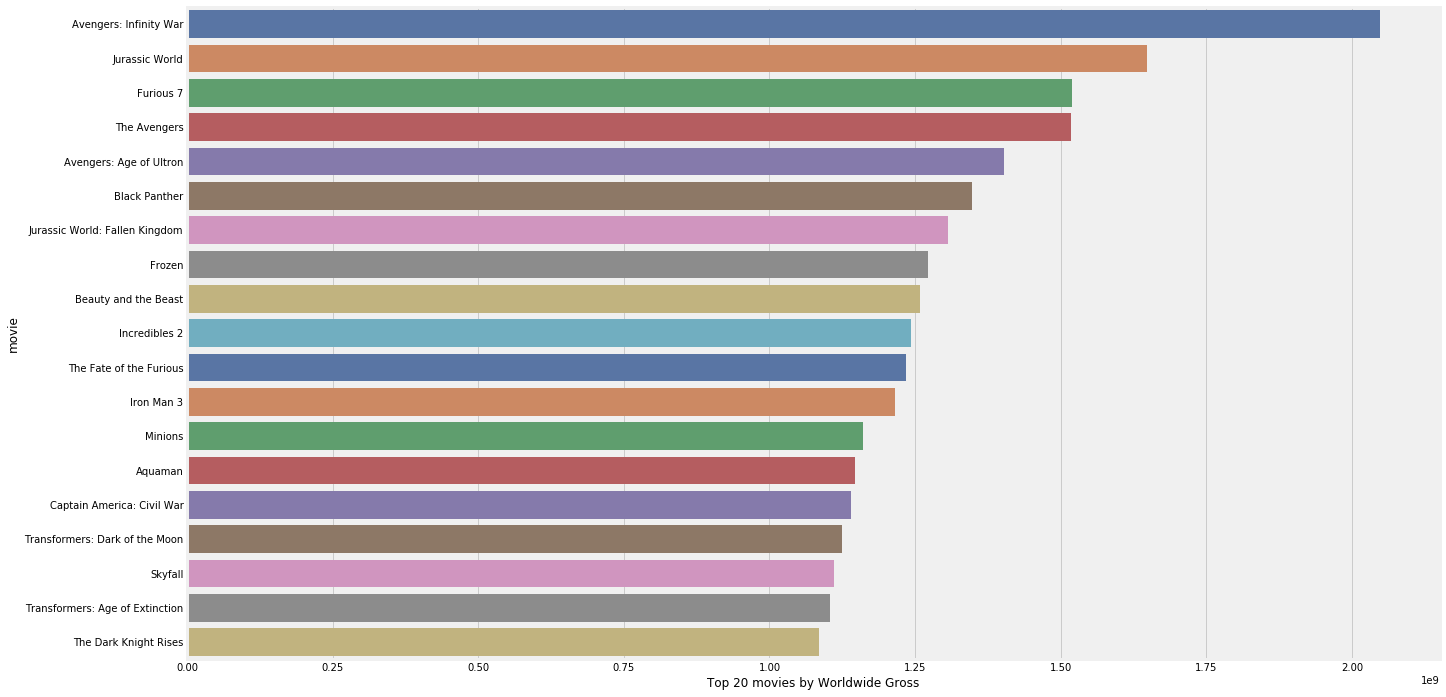

In [273]:
sample = sample.sort_values('worldwide_gross',ascending=False).head(20)

f, ax = plt.subplots(figsize=(20,12))
plt.style.use('fivethirtyeight')
sns.barplot(sample['worldwide_gross'],sample['movie'], palette='deep')
ax.set(xlabel='Top 20 movies by Worldwide Gross')


In [75]:
#Change date to datetime dtype
df_tn['release_date'] = pd.to_datetime(df_tn['release_date'])

#Convert revenue gross and production budget columns from string to int
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.split('$').map(lambda x: x[1].replace(',',''))
df_tn['worldwide_gross']= pd.to_numeric(df_tn['worldwide_gross'])

df_tn['production_budget'] = df_tn['production_budget'].str.split('$').map(lambda x: x[1].replace(',',''))
df_tn['production_budget']= pd.to_numeric(df_tn['production_budget'])

df_tn['domestic_gross'] = df_tn['domestic_gross'].str.split('$').map(lambda x: x[1].replace(',',''))
df_tn['domestic_gross']= pd.to_numeric(df_tn['domestic_gross'])

#Create foriegn gross column
df_tn['foreign_gross'] = df_tn['worldwide_gross'] - df_tn['domestic_gross']



In [91]:
df_tn['year'] = df_tn['release_date'].dt.to_period('Y')

In [110]:
int(df_tn['year'][0].strftime('%Y'))

2009

In [111]:
df_tn['last_five_years'] = df_tn['year'].apply(lambda x:'yes' if int(x.strftime('%Y'))>2014 else 'no')

[Text(0.5, 0, 'Top 20 movies by Worldwide Gross')]

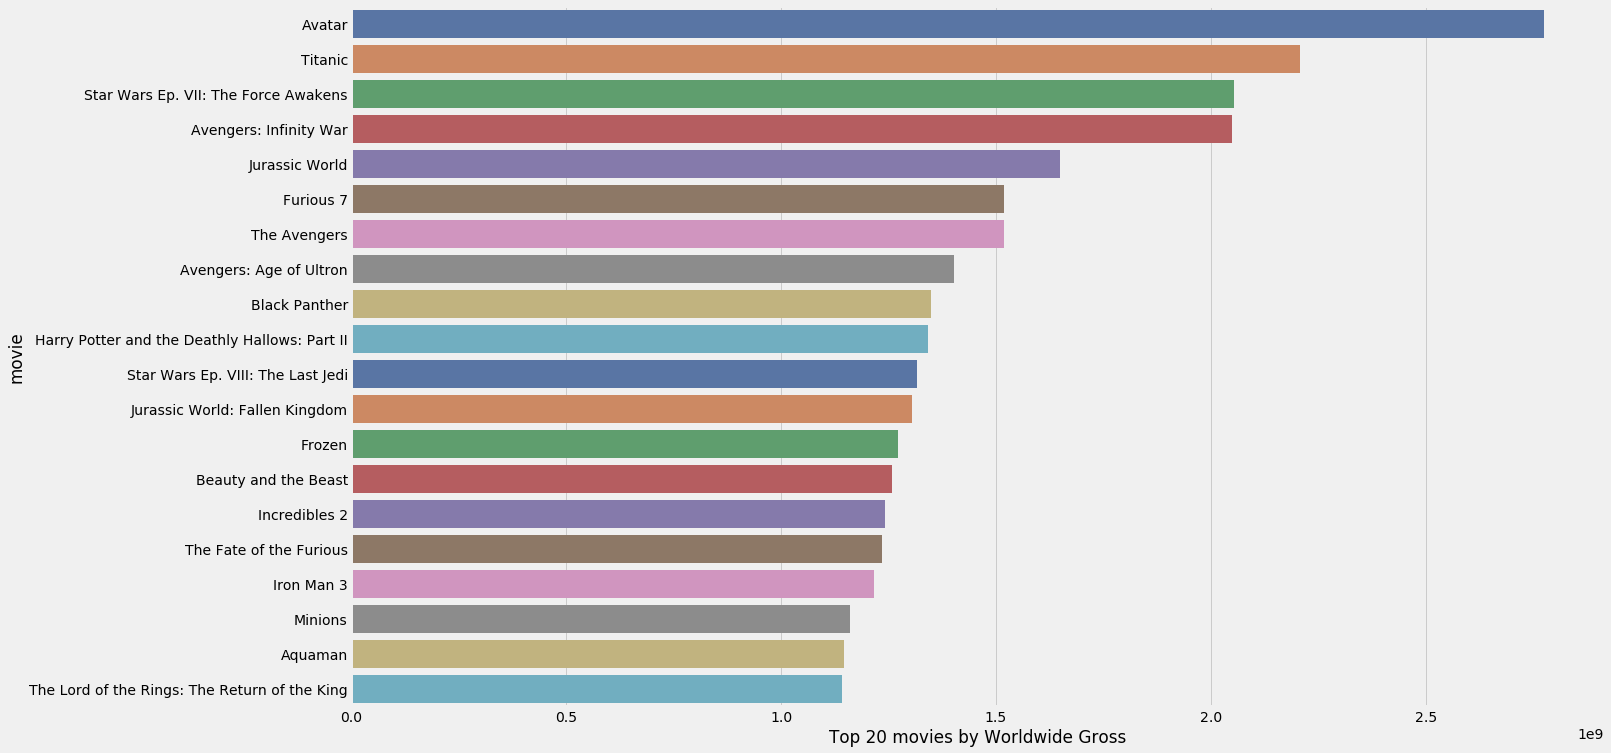

In [136]:
graph_tn = df_tn.sort_values('worldwide_gross',ascending=False).head(20)

f, ax = plt.subplots(figsize=(20,12))
plt.style.use('fivethirtyeight')
sns.barplot(graph_tn['worldwide_gross'],graph_tn['movie'], palette='deep')
ax.set(xlabel='Top 20 movies by Worldwide Gross')


[Text(0.5, 0, 'Top 20 movies by Foreign Gross')]

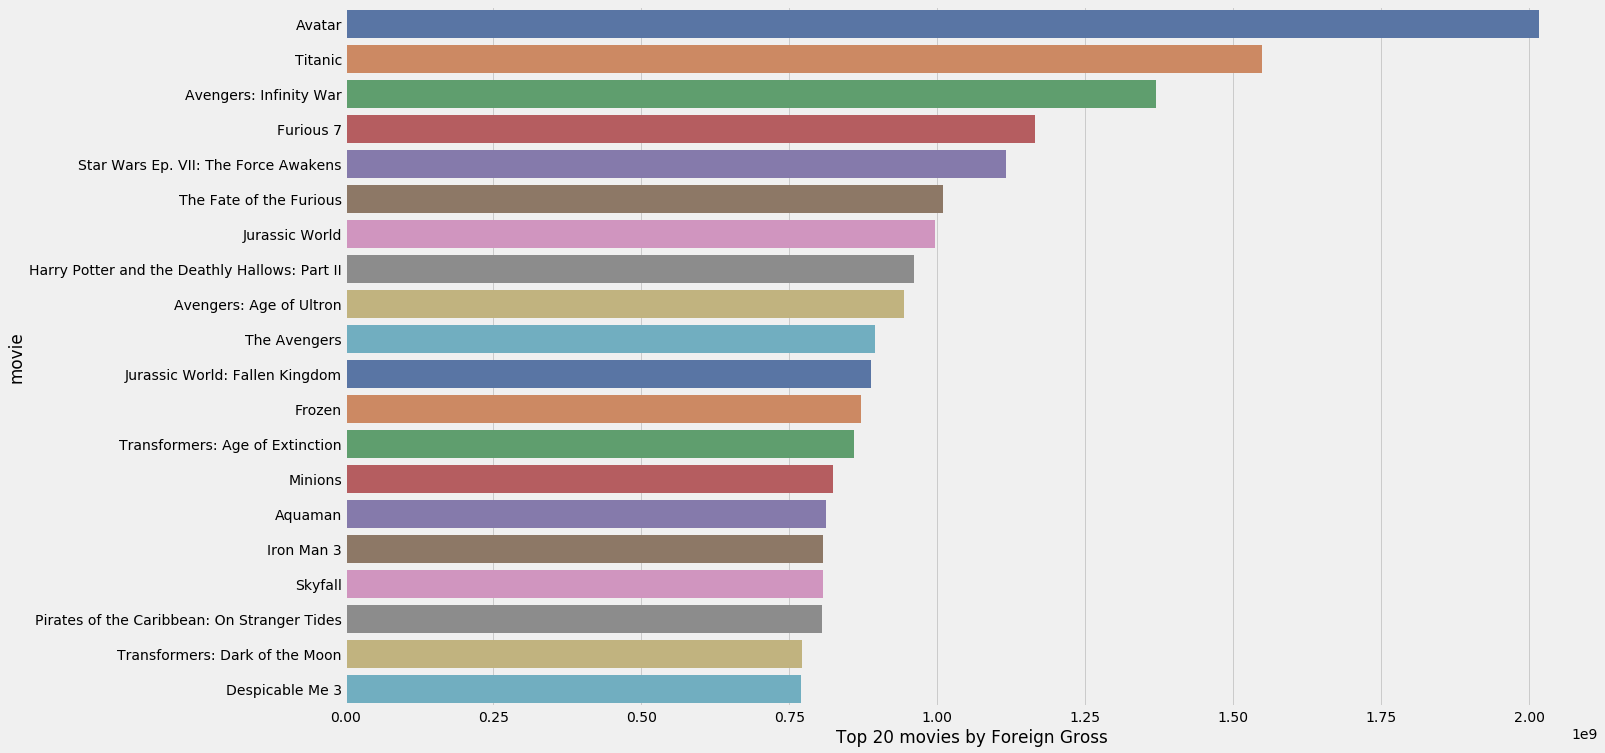

In [141]:
graph_tn = df_tn.sort_values('foreign_gross',ascending=False).head(20)

f, ax = plt.subplots(figsize=(20,12))
plt.style.use('fivethirtyeight')
sns.barplot(graph_tn['foreign_gross'],graph_tn['movie'], palette='deep')
ax.set(xlabel='Top 20 movies by Foreign Gross')


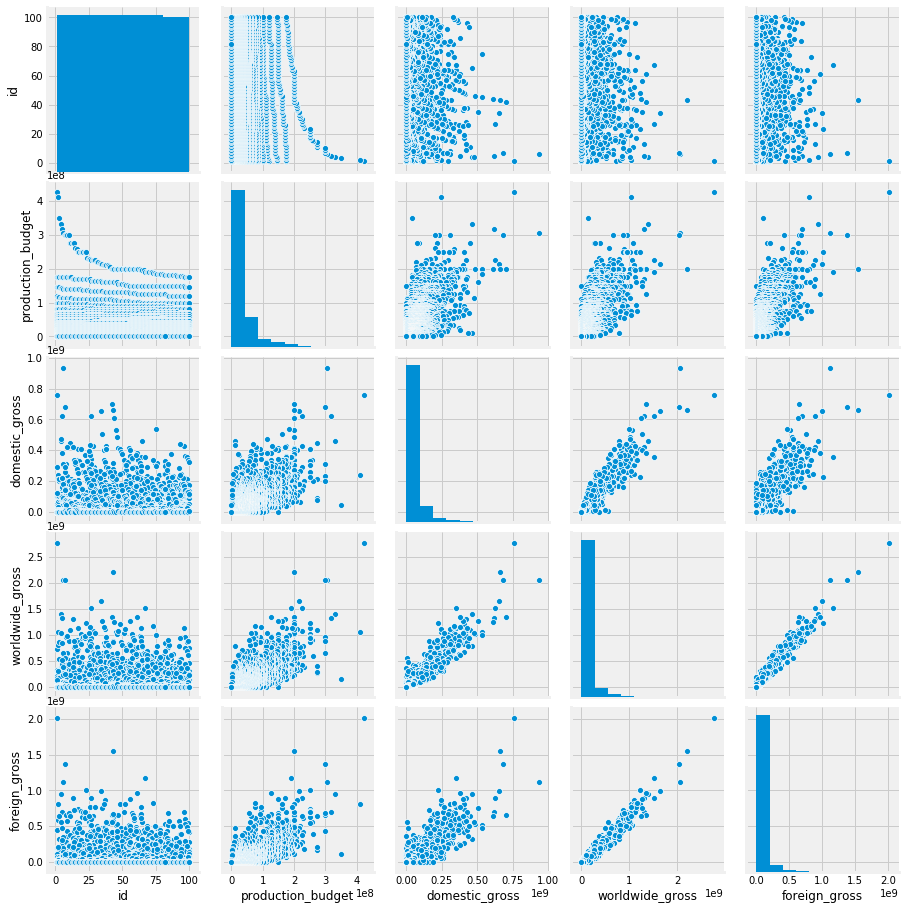

In [116]:
sns.pairplot(df_tn)

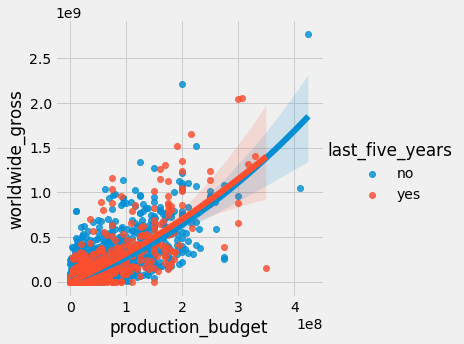

In [183]:
sns.lmplot('production_budget','worldwide_gross', hue = 'last_five_years',order =2, data = df_tn)
#clean data /divivd columns + add labels

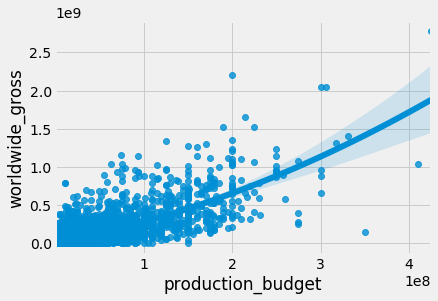

In [182]:
sns.regplot('production_budget','worldwide_gross', order=2,ci=95, data = df_tn)

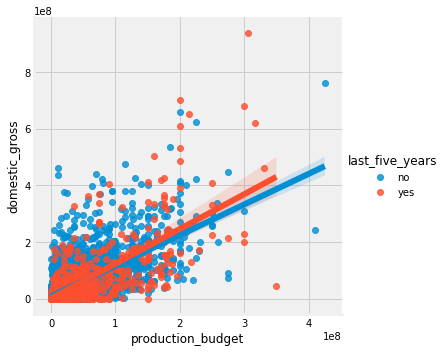

In [115]:
sns.lmplot('production_budget','domestic_gross', hue = 'last_five_years', order data = df_tn)

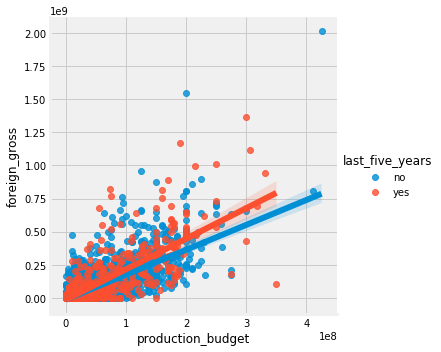

In [114]:
sns.lmplot('production_budget','foreign_gross', hue = 'last_five_years', data = df_tn)

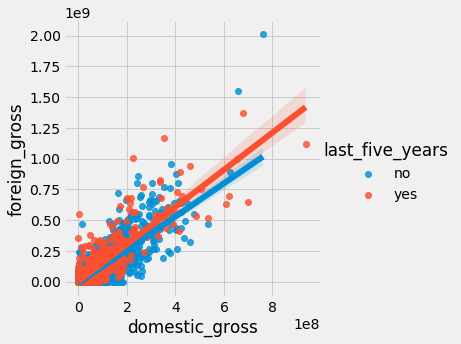

In [162]:
sns.lmplot('domestic_gross','foreign_gross',hue = 'last_five_years', data = df_tn)

# QUESTION 3: HOW DO DIFFERENT PEOPLE IMPACT THE MOVIE SUCCESS?

In [ ]:
# People Cleaning

df_imdb_name_basics= pd.read_sql_query("""
SELECT *
FROM imdb_name_basics
;""", con)

df_imdb_name_basics

In [ ]:
#Clean Known_For Column
known_for = df_imdb_name_basics['known_for_titles'].str.split(',tt')
known_for = df_imdb_name_basics['known_for_titles'].str.replace('tt','')
known_for = known_for.str.split(',')

In [ ]:
#Set Up Master Dictionary
master_dict = master_imdb_tmdb[['imdb_id','primary_title']].set_index('imdb_id').to_dict()['primary_title']


In [ ]:
#Insert Cleaned Column
df_imdb_name_basics['known_for_titles_cleaned'] = known_for

In [ ]:
#Loop Through Column and Assign Movie Names

empty_list = []

for row in df_imdb_name_basics['known_for_titles_cleaned']:
    empty_row = []
    for object in row:
        if object.isdigit():
            if int(object) in master_dict.keys():
                xyz = master_dict[int(object)]
                empty_row.append(xyz)
    empty_list.append(empty_row)

featured_movies = pd.DataFrame(empty_list,columns=['1st_movie','2nd_movie','3rd_movie','4th_movie'])


In [ ]:
#Merge Back Into Main Table

df_imdb_name_basics = pd.merge(df_imdb_name_basics,featured_movies,left_index=True,right_index=True)


In [ ]:
#Unpack Primary_Profession - CAREFUL, TAKES FOREVER TO RUN
full_profession = df_imdb_name_basics['primary_profession'].str.split(',').apply(frozenset).to_frame(name='primary_profession')
for profession in frozenset.union(*full_profession.primary_profession):
    full_profession[profession] = full_profession.apply(lambda _: int(profession in _.primary_profession), axis=1)
full_profession

In [ ]:
#Combine Back Into Main Table

df_imdb_name_basics = pd.merge(df_imdb_name_basics,full_profession,left_index=True,right_index=True)


In [ ]:
#Table Check
df_imdb_name_basics.loc[df_imdb_name_basics['primary_name']=='Idris Elba']

In [ ]:
#Add Popularity for 1st,2nd,3rd,4th Movies

popularity_dict = master_imdb_tmdb[['imdb_id','popularity']].set_index('imdb_id').to_dict()['popularity']

empty_list = []

for row in df_imdb_name_basics['known_for_titles_cleaned']:
    empty_row = []
    for object in row:
        if object.isdigit():
            if int(object) in master_dict.keys():
                xyz = popularity_dict[int(object)]
                empty_row.append(xyz)
    empty_list.append(empty_row)

featured_movies_popularity = pd.DataFrame(empty_list,columns=['1st_movie_popularity','2nd_popularity','3rd_popularity','4th_popularity'])

featured_movies_popularity

In [ ]:
featured_movies_popularity['1st_movie_popularity'].value_counts()

In [ ]:
#Merge Popularity Into Main Table

df_imdb_name_basics = pd.merge(df_imdb_name_basics,featured_movies_popularity,left_index=True,right_index=True)

In [ ]:
#Drop Rows Where We Have No Movie Match

df_imdb_name_basics = df_imdb_name_basics.dropna(subset=['1st_movie','2nd_movie','3rd_movie','4th_movie'],how='all')